
## 배깅 (분류)

> sklearn.ensemble.BaggingClassifier(<br>
&emsp; &emsp; base_estimator=None, <br>
&emsp; &emsp; n_estimators=10, <br>
&emsp; &emsp; max_samples=1.0, max_features=1.0, <br>
&emsp; &emsp; bootstrap=True, <br>
&emsp; &emsp; bootstrap_features=False, <br>
&emsp; &emsp; oob_score=False)




base_estimator : 배깅에서 수행할 분류기 (None이면 DecisionTreeClassifier를 수행)<br>
n_estimators : 앙상블의 분류기 모델의 수 (int, default=10)<br>
max_samples : 각 기본 추정량을 훈련하기 위해 추출 할 샘플 수 (int or float, default=1.0)<br>
max_features : 각 기본 추정량을 훈련하기 위해 사용할 컬럼의 수 (int or float, default=1.0)<br>
bootstrap : 샘플(행)을 복원추출할지 여부 (bool, default=True)<br>
bootstrap_features : feature(열)를 복원추출할지 여부 (bool, default=False)<br>
oob_score : 일반화 오류를 추정하기 위해 out-of-bag 샘플을 사용할지 여부 (bool, default=False)

<br><br>

> BaggingClassifier().fit(X, Y) # 모델 적합<br>
> BaggingClassifier().predict(X) # 모델을 사용하여 분류 결과 예측<br>
> BaggingClassifier().predict_proba(X) # X의 각 행에 대하여 Y값의 각 클래스 확률<br>
> BaggingClassifier().estimators_samples_ # 각 분류기 생성에 사용된 샘플의 인덱스

<br>

<b>[예제]</b>
credit 데이터를 train과 test 데이터로 분할하고 train 데이터를 활용하여 Bagging 모델을 만들어라

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

credit = pd.read_csv("../data/credit_final.csv")
X = credit[credit.columns.difference(['credit.rating'])]
y = credit[['credit.rating']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
X_train.head()

,account.balance,age,apartment.type,bank.credits,credit.amount,credit.duration.months,credit.purpose,current.assets,dependents,employment.duration,foreign.worker,guarantor,installment.rate,marital.status,occupation,other.credits,previous.credit.payment.status,residence.duration,savings,telephone
133,3,26,2,1,1453,18,3,1,1,1,1,1,3,1,3,2,2,1,1,1
464,2,24,1,1,7472,12,4,1,1,1,1,1,1,1,1,2,2,2,4,1
919,1,46,3,2,6331,48,1,4,1,4,1,1,4,3,3,2,3,4,1,2
865,3,39,3,2,1271,15,3,4,1,2,1,1,3,3,3,2,3,4,4,2
352,3,46,2,2,7629,48,4,3,2,4,1,1,4,1,4,1,3,2,4,1


In [2]:
credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [3]:
from sklearn.tree import DecisionTreeClassifier # 결정트리
from sklearn.ensemble import BaggingClassifier # 배깅

# 분류기 100개 생성, 샘플의 100%(복원추출)와 컬럼 모두의 무작위 하위 집합을 기반으로 함
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                        n_estimators=100, max_samples=1.0, 
                        max_features=1.0)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("accuracy_score : ", clf.score(X_test, y_test))

C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


accuracy_score :  0.75


In [4]:
from sklearn.metrics import confusion_matrix # 오차행렬
# 정밀도, 재현율, F1 스코어 : f1_score(test_y, pred)로 사용
from sklearn.metrics import precision_score, recall_score, f1_score 

# 오차행렬
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True[0]', 'True[1]'],
             columns=['Pred[0]','Pred[1]'])

,Pred[0],Pred[1]
True[0],46,51
True[1],24,179


##### ROC 곡선
- x축은 특이도, y축은 재현율을 가지는 그래프
- 민감도(TPR)은 1 이고, 특이도(FPR)는 0인 경우 가장 이상적   
  
|이름|의미|
|---|---|
|민감도(재현율)|실제 True일 때 True라고 예측하는 비율|
|특이도|실제 False일 때 False라고 예측하는 비율|


##### AUC
- ROC 곡선의 아래 면적을 계산한 것으로 값이 클수록 모델의 성능이 좋다고 판단 가능

<br>

roc_auc_score
- bineary 분류일 때 : roc_auc_score(Y, clf.predict_proba(X)[:, 1])
- 다중 클래스 분류일 때 : roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')
- 여러 개의 라벨을 분류할 때 : roc_auc_score(y, y_pred, average=None)

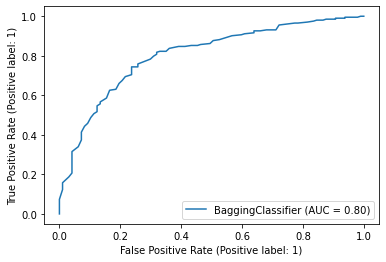

roc_auc_score : 0.8035396881824183


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score

plot_roc_curve(clf, X_test, y_test)
plt.show()

print("roc_auc_score :", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

##### oob_score

: bootstrapping을 수행하면 평균적으로 각 예측기에 훈련 데이터의 63% 정도만 샘플링 되는데, <br>
이 때 선택되지 않은 나머지 37%를 Out of bag 샘플이라고 함 (예측기마다 남겨진 37%는 모두 다름)<br>
oob_score = True를 하면 oob 데이터를 모델의 평가를 위해 사용함 (검증 세트나 교차검증 필요 없음)

In [7]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                        n_estimators=100, 
                        max_samples=1.0, max_features=1.0, 
                        oob_score=True)
clf = clf.fit(X, y)
clf.oob_score_



C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.761

In [8]:
## 변수의 중요도 확인

import numpy as np
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in clf.estimators_], axis=0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis=1)
feature_importances.columns=["col_name","feature_importance"]
feature_importances


,col_name,feature_importance
0,account.balance,0.129476
1,age,0.118130
2,apartment.type,0.021781
3,bank.credits,0.013898
4,credit.amount,0.172914
5,credit.duration.months,0.110989
6,credit.purpose,0.048737
7,current.assets,0.046507
8,dependents,0.011474
9,employment.duration,0.044320


In [9]:
feature_importances = feature_importances.sort_values(by="feature_importance",ascending=False).reset_index(drop=True)
feature_importances

,col_name,feature_importance
0,credit.amount,0.172914
1,account.balance,0.129476
2,age,0.118130
3,credit.duration.months,0.110989
4,credit.purpose,0.048737
5,current.assets,0.046507
6,previous.credit.payment.status,0.046204
7,savings,0.045871
8,employment.duration,0.044320
9,residence.duration,0.039043


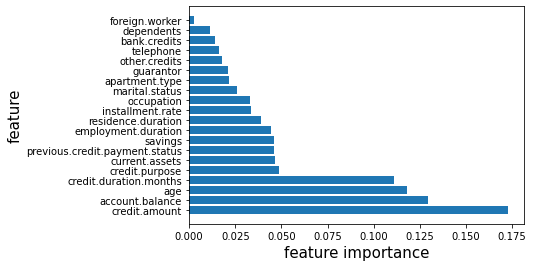

In [10]:
import matplotlib.pyplot as plt


plt.barh(feature_importances["col_name"], feature_importances["feature_importance"], align='center')

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()


* 변수의 상대적 중요도를 보았을 때, Credit Amount, Account Balance, age, Duration of Credit (month) 순으로 변수 중요도가 큰 것을 파악할 수 있음